# Red Neuronal de reconocimento facial

### El proyecto consiste en una red neuronal que recibe imagenes de entrada para entrenamiento (donde se indica los nombres de las personas de cada imagen) de la misma red, posteriormente se introducen imagenes de prueba, sin nombres, para que la red neuronal indique el nombre de la persona

#### Conozcan a Riho takada:
![title](RihoTakadaFULL.jpg)

#### Y a Rui Kiriyama:
![Rui](RuiKiriyamaFULL.jpg)
(Si... un poco pervertido el asunto, pero #YOLO)

#### Quienes serán nuestras modelos, se entrenará la red con una variedad de imagenes de ellas, incluyendo el nombre para que esta aprenda a hacer el reconocimiento facial.
#### Por simplicidad, nos ahorramos el paso de detección facial (es decir, de una foto completa, que el algoritmo encuentre el rosto) y solamente pasaremos el rostro para hacer el entrenamiento. Si sobra tiempo, realizaremos también la detección facial
#### Las imagenes se pasarán en un formato .png con un tamaño de 300 x 300 px
### ACTUALIZACIÓN:
#### Las imagenes se van a pasar en formato .png con tamaño de 30 x 30 px, inicialmente se pasará cada pixel como entrada a la red neuronal

# Creación de la red 

## (Primer objetivo propuesto)

In [15]:
# CAMBIO REALIZADO PARA PROBAR LA RED: AHORA IMPLEMENTARÁ 1 NEURONA DE SALIDA
import numpy as np

#La red neuronal 
#Primero hay que calcular feed-forward
#Después hay que calcular el error
#Ya calculado el error se realiza el back-propagation
#Se actualizan los pesos        

class neuralnet:
    def __init__(self, inpn):
        self.inputneurons=inpn #Numero de neuronas de entrada
        self.outputneurons=1
        
        #Iniciamos las capas ocultas como un arreglo de zeros
        #Iniciamos los pesos
        self.w1=np.random.randn(inpn, inpn)
        self.w2=np.random.randn(inpn, inpn)
        self.w3=np.random.randn(inpn, inpn)
        self.w4=np.random.randn(inpn, 1)
        
    #Función sigmoide
    def sigmoid(self, x, d):
        """
        Función sigmoide
        Entrada: variable flotante X (valor inicial de una neurona de la capa oculta), booleano D para definir si queremos la derivada o la función original
        Salida: el resultado de aplicar a X la función sigmoide (o su derivada)
        """
        if (d == True):
            return x*(1-x)
        else:
            return 1/(1+np.exp(-x))
    
    #Para entrenar la red, recibe un ejemplo de entrenamiento y el número de epocas de entrenamiento deseadas, de preferencia arriba de 10000
    #UTILIZAREMOS 3 CAPAS OCULTAS, COMO AÚN NO EXTRAEMOS LAS CARACTERÍSTICAS DE LAS IMAGENES, ESTO SE VA A DESCONTROLAR FEO
    def train(self, inputarr, Y, epoch):
        X=inputarr.reshape(1, self.inputneurons)
        graphvar=[]
        for e in range(epoch):
            #Feed-forward
            h0 = self.sigmoid(np.dot(X, self.w1), False)
            h1 = self.sigmoid(np.dot(h0, self.w2), False)
            h2 = self.sigmoid(np.dot(h1, self.w3), False)
            Outl = self.sigmoid(np.dot(h2, self.w4), False)
            
            #Calculo de error
            error_calc= Y - Outl
            
            #BonitoDebug
            if (e%500==0):
                graphvar.append(np.mean(np.abs(error_calc)))
                print("Error medio: " + str(np.mean(np.abs(error_calc))))
                
            #Back-Propagation
            outDelta = error_calc*self.sigmoid(Outl, True)            
            h2err = outDelta.dot(self.w4.T)
            h2Delta = h2err * self.sigmoid(h2, True)
            h1err = h2Delta.dot(self.w3.T)
            h1Delta = h1err * self.sigmoid(h1, True)
            h0err = h1Delta.dot(self.w2.T)
            h0Delta = h0err * self.sigmoid(h0, True)
            
            #Actualización de pesos
            self.w1+=X.T.dot(h0Delta)
            self.w2+=h0.T.dot(h1Delta)
            self.w3+=h1.T.dot(h2Delta)
            self.w4+=h2.T.dot(outDelta)
        
        #Para efectos prácticos graficaremos esta babosada, a ver si está aprendiendo o no
        graphx=[i for i in range(len(graphvar))]
        plt.plot(graphx, graphvar)
    
    #ESTA EVIDENTEMENTE LA TENDREMOS QUE REESCRIBIR
    def test(self, testarr):
        X=testarr.reshape(1, self.inputneurons)
        l0 = self.sigmoid(np.dot(X, self.w1), False)
        l1 = self.sigmoid(np.dot(l0, self.w2), False)
        l2 = self.sigmoid(np.dot(l1, self.w3), False)
        self.pred_o = self.sigmoid(np.dot(l2, self.w4), False)
        #print(str(self.pred_o))

### Una clase para obtener todas las muestras

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Para facilitar la obtención de elementos de entrenamiento y de prueba, los instanciaremos en un objeto
class GetImages:
    #Strings para generalizar el uso sin comillas
    
    def __init__(self):
        self.Training=[]
        self.Test=[]
        self.train='train'
        self.test='test'
        
    def Abrir(self, imtype, nom):
        """
        Función abrir: Se utiliza para abrir una imagen dado el nombre del archivo (string)
        Entrada: imtype variable para definir si queremos abrir una imagen de entramiento (train) o de prueba (test)
        Salida: Un objeto imagen matplotlib
        """
        if (imtype=='train'):
            prefix='TrainSamples/'
        elif (imtype=='test'):
            prefix='TestSamples/'
        return mpimg.imread(prefix+nom+'.png')
    
    #Así bonito para simplemente decirle obj.getTrainingSamples() o obj.getTestSamples()
    def getTrainingSamples(self):
        self.getElemens(self.train)
    
    def getTestSamples(self):
        self.getElemens(self.test)
    
    #Básicamente este método hace toda la magia
    def getElemens(self, elemtype):
        #Arreglo auxiliar de números
        trainnumbers=[]
        testnumbers=[]
        #sé que esto lo puedo generalizar para cualquier cantidad de imágenes, pero de momento me interesa ás
        #que funcione como lo tengo, así que lo haré para mi caso particular
        for i in range(1, 9):
            trainnumbers.append('00'+str(i))
            trainnumbers.append('10'+str(i))
            testnumbers.append('00'+str(i))
            testnumbers.append('10'+str(i))
        
        for i in range(9, 16):
            if(i<10):
                trainnumbers.append('00'+str(i))
                trainnumbers.append('10'+str(i))
            else:
                trainnumbers.append('0'+str(i))
                trainnumbers.append('0'+str(i))
        imarr=[]
        if(elemtype=='train'):
            numbers=trainnumbers
        else:
            numbers=testnumbers
            
        for i in range(len(numbers)):
            imarr.append(self.Abrir(elemtype, numbers[i]))
        
        G=[]
        for i in imarr:
            G.append(i[:,:,0])
        
        if(elemtype=='train'):
            self.Training=G
        else:
            self.Test=G

# Extracción de características

### (Segundo objetivo propuesto)

Hasta ahorita ya cumplimos el primer objetivo (crear la red neuronal), la cuál se instancia como un objeto y cuenta con sus métodos para entrenar y para probar con simplemente pasarle una imagen, la cuál se "rompe" de momento en pixeles los cuáles "alimentan" la red neuronal como valores de entrada.

Sin embargo, este método no es eficiente ni óptimo, entrenar la red neuronal con tan solo 1 ejemplo de entrenamiento tarda mucho tiempo, esto se vuelve muy torpe al querer introducir varios ejemplos de entrenamiento, además que la salida que "predice" no es muy acertada.

Para esto (tras realizar un poco de investigación) utilizaremos "Eigenfaces"

## Eigenfaces

El concepto consiste en un conjunto de eigenvectores (vectorer característicos de una transformación lineal -> un poco de álgebra lineal), los cuales forman un conjunto base de todas las imágenes utilizadas para construir una matriz de covarianza (a su vez, estos se derivan de esta, de la distribución de probabilidad del espacio vectorial de imágenes de rostros)

### Cómo generarlas

Un conjunto de eigenfaces se puede generar aplicando un proceso matemático llamado "Análisis de componente principal" (PCA) en un conjunto de imágenes. Por ejemplo: un rostro se puede generar del "rostro promedio" + 10%, 55%,  -3% de las eigenfaces 1, 2 y 3 respectivamente.

*Se suponen M imágenes de entrenamiento
*K eigenfaces más significativas usandolas podemos satisfactoriamente aproximar una cara por lo que K < M
*Todas las imágenes son matrices N x N, que se pueden representar como vectores N^2 x 1 dimensionales

##### Dicho lo anterior el algoritmo dice:
1.- Obtener M imágenes de entrenamiento I1, I2, ..., IM <br>
2.- Representar cada imágen Ii como vector (G) (tal como se mencionó anteriormente)<br>
3.- Encontrar el vector de rostro promedio Psi = 1/M * SUM(i=1, M) Gi<br>
4.- Sustraer la "cara media" de cada vector Gi para obtener un conjunto de vectores Phi_i (Al hacer esto nos quedamos sólo con las características que distinguen cara cara, removiendo de una forma información común) (esto es Phi_i = Gi - Psi).<br>
5.- Encontrar matriz de Covarianza C: C=AA^t donde A=[Phi1, Phi2, ..., PhiM].<br>
6.- Calcular los Eigenvectores u_i de C, como C es una matriz de N^2 x N^2, debería regresar N^2 eigenvectores, cada uno siendo N^2 dimensional: Considerar la matriz (A^t)A, si encontramos los eigenvectores de esta matriz, debería regresar M eigvenvectores, cada uno de dimensión M x 1, esto lo denominaremos eigenvectores v_i.<br>
De lo anterior se sigue que: u_i = Av_i. Esto implica que usando v_i podemos calcular los M eigenvectores más grandes de AA^t. (Recordar que M es simplemente el número de imagenes de entrenamiento).<br>
7.- Encontrar los mejores M eigenvectores de C=AA^t usando u_i = Av_i: Teniendo en mente que ||u_i||=1.<br>
8.- Selecionar los mejores K Eigenvectores (esto se hace heuristicamente).<br>

##### Nota:
Los eigenvectores encontrados por el algoritmo, cuando se convierten en una matriz en un proceso de reversa al paso 2, tienen una apariencia similar a la de un rostro. Como estos son eigenvectores que tienen una apariencia como de una cara, se les llaman "Eigenfaces". Dato curioso que encontré en un blog (del cuál saqué el algoritmo) A veces también se les llama Imágenes de fantasmas por sus apariencias SINIESTRAS y Perturbadoras: Fuente: https://onionesquereality.wordpress.com/2009/02/11/face-recognition-using-eigenfaces-and-distance-classifiers-a-tutorial/

In [17]:
from PIL import Image
#Intentemos hacer el código para generar las eigenfaces
def eigenface(im_vec, size):
    """
    Función eigenface - Se utiliza para calcular las eigenfaces
    Entrada: Vector de imágenes de entrenamiento (PASO 1)
    Salida: Vector de eigenfaces
    """
    G=[] #El vector de las I's
    Phi=[] #El vector Phi, el de las características que distinguen a cada cara
    #Primero "Aplanamos" todos los vectores de im_vec (PASO 2)
    for im in im_vec:
        g=im.flatten().reshape(1,size)
        G.append(g)
    #Ahorita el vector I debe ser de tamaño M
    M=len(G)
    #Encontramos el vector de rostro promedio (PASO 3)
    psi=np.mean(G, axis=0)
    #Sustraer la "Cara media" de cada vector Gi para obtener un conjunto de vectores Phi (PASO 4)
    for g in G:
        p=g-psi
        Phi.append(p)
    #Encontrar Matriz de Covarianza (Paso 5)
    Aux=[]
    for ph in Phi:
        Aux.append(ph[0])
    A=np.vstack(Phi)
    C=np.cov(A)
    Aux=np.array(Aux)
    C=np.matrix(Aux.transpose())*np.matrix(Aux)
    C/=M
    #Calcular los Eigenvectores u de C (PASO 6)
    L=np.matrix(Aux)*Aux.transpose()
    #print(L.shape)
    U, S, V = np.linalg.svd(Aux.transpose(), full_matrices=False)
    U=U[:,:20] #Seleccionando solamente las K mejores eigenfaces, yo decidí elegir sólo las 20 mejores
    return [U, S, psi]
    
samples = GetImages()
samples.getTrainingSamples()
U, S, Med = eigenface(samples.Training, 900)

#Este vector w va a ser de 900, M*(len(Aux)), cada w es un "descriptor" de la cara objetivo
#Si dejo así el tamaño, sería de 900x900, donde los primeros 900 x 30 corresponden a Rui, los siguientes a Riho y así
#sucesivamente cada 30

efv=[]
for i in range(len(U[0])):
    t=np.reshape(U[:,i], (30,30))
    efv.append(t)
#Convenientemente convertimos nuevamente el vector de la cara media en una matriz 30 x 30
#plt.imshow(efv[18], cmap = plt.get_cmap('gray'))

Med=np.reshape(Med, (30,30))

# Volvamos a intentar entrenar la red
Ahora que tenemos caras características, intentaremos de nuevo entrenar la red pero ahora usando las caras características
Básicamente en este punto se podría decir que ya logramos el objetivo del programa (pongame 10 profe), pero todavía se puede refinar, lo que quiere decir que, de aquí a la fecha de entrega intentaré optimizarlo lo más que pueda (obtener correctamente las eigenfaces)

### Ahora el paradigma es, cómo alimentaremos a la red neuronal con esta información (cumplimos a tiempo los primeros objetivos propuestos, pero llega este nuevo objetivo a cubrir un hueco para la siguiente semana)

Según este paper: http://bit.csc.lsu.edu/~jianhua/zhifeng-yun.pdf se crea una red neuronal para cada persona de los ejemplos, en este caso como son sólo 2 personas, se crearán 2 redes neuronales, esto implica un cambio de estructura: Ahora tendrán sólo 1 neurona de salida cada red, y marcará un 1 para la persona que corresponde

Error medio: 0.0369084557191
Error medio: 0.00945518909716
Error medio: 0.00663999051471
Error medio: 0.00537540386207
Error medio: 0.00462266649783
Error medio: 0.00411111017885
Error medio: 0.00373522648953
Error medio: 0.00344438442097
Error medio: 0.0032109100314
Error medio: 0.00301825283014
Error medio: 0.988234800838
Error medio: 0.0113085525688
Error medio: 0.00797366175486
Error medio: 0.00651009998552
Error medio: 0.00564027074577
Error medio: 0.00504742454944
Error medio: 0.00461005206151
Error medio: 0.00427020365705
Error medio: 0.00399627204082
Error medio: 0.00376935698841
Error medio: 0.681812520195
Error medio: 0.00965951953437
Error medio: 0.00682202574552
Error medio: 0.00556603516908
Error medio: 0.00481784188504
Error medio: 0.00430753335058
Error medio: 0.00393100972244
Error medio: 0.00363848680865
Error medio: 0.00340276766746
Error medio: 0.00320757358194
Error medio: 0.683134219612
Error medio: 0.00936228142591
Error medio: 0.00696558074372
Error medio: 0.0058

Error medio: 0.00220351686693
Error medio: 0.00205542093863
Error medio: 0.00193335663079
Error medio: 0.999788384688
Error medio: 0.0178634924412
Error medio: 0.00942253875679
Error medio: 0.00718676027359
Error medio: 0.00603655350591
Error medio: 0.00530647559905
Error medio: 0.00479041852747
Error medio: 0.00440075848319
Error medio: 0.00409307337857
Error medio: 0.0038421213659
Error medio: 0.996367643396
Error medio: 0.0078670497345
Error medio: 0.00543625821183
Error medio: 0.00439062790224
Error medio: 0.00377495261239
Error medio: 0.00335803246468
Error medio: 0.00305203312998
Error medio: 0.00281530811347
Error medio: 0.00262523698364
Error medio: 0.00246833825871
Error medio: 0.101513661985
Error medio: 0.00928365732352
Error medio: 0.00648358225429
Error medio: 0.00526320762729
Error medio: 0.00454356562467
Error medio: 0.00405620275632
Error medio: 0.00369848906972
Error medio: 0.0034216940955
Error medio: 0.00319935381016
Error medio: 0.00301570683094
Error medio: 0.99665

Error medio: 0.00423390312994
Error medio: 0.00372395107396
Error medio: 0.00335772401871
Error medio: 0.00307906443544
Error medio: 0.00285823368032
Error medio: 0.00267786939628
Error medio: 0.879953828959
Error medio: 0.00958377848466
Error medio: 0.00690689869466
Error medio: 0.00569198163497
Error medio: 0.00495862963911
Error medio: 0.00445417930944
Error medio: 0.00407973467552
Error medio: 0.00378750980206
Error medio: 0.00355119550193
Error medio: 0.00335494741622
Error medio: 0.996811425082
Error medio: 0.00576961977277
Error medio: 0.0039310585577
Error medio: 0.00315545631961
Error medio: 0.0027055417747
Error medio: 0.00240413454794
Error medio: 0.0021846806911
Error medio: 0.00201594602978
Error medio: 0.00188111487062
Error medio: 0.00177024090081
Error medio: 0.999815050035
Error medio: 0.0119981475239
Error medio: 0.00777711638858
Error medio: 0.00624612815817
Error medio: 0.0053842126907
Error medio: 0.00481037120323
Error medio: 0.00439200588533
Error medio: 0.004069

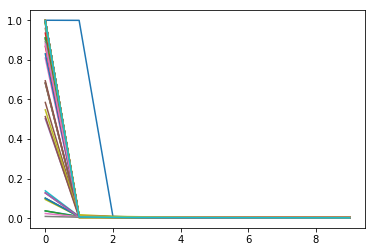

In [45]:
#Extrayendo vectores característicos
ruiSamp=[]
rihoSamp=[]

for i in range(len(samples.Training)):
    if (i%2==0):
        ruiSamp.append(samples.Training[i])
    else:
        rihoSamp.append(samples.Training[i])

#Nuevamente, se que esto se puede generalizar más, pero tendré que hacerlo así por simplicidad y porque sabemos que ambas
#muestras son del mismo tamaño
for i in range(len(ruiSamp)):
    ruiSamp[i]=np.dot((ruiSamp[i]-Med).flatten().reshape(1,900), U)
    rihoSamp[i]=np.dot((rihoSamp[i]-Med).flatten().reshape(1,900), U)

## LO ANTERIOR ES CON LO QUE ENTRENAREMOS LA RED, EL VECTOR CARACTERÍSTICO REPRESENTA LA APORTACIÓN DE CADA EIGENFACE
## A LA CARA ORIGINAL, POR ESO EL VECTOR CARACTERÍSTICO DE CADA CARA ES DE TAMAÑO 1 x K

N, K = U.shape

redTakada=neuralnet(K)
redKiriyama=neuralnet(K)
"""
NO LO OLVIDES RICK:
ENTRENA LA RED CON LOS VECTORES OBTENIDOS, SACA A LOS DATOS DE PRUEBA SUS VECTORES CARACTERÍSTICOS, PRUEBA LA RED
YA CON ESTO, TERMINASTE EL PROYECTO DE PROGRAMACIÓN CIENTÍFICA ANTES DE TIEMPO
"""
for i in range(len(ruiSamp)):
    redKiriyama.train(ruiSamp[i], 1, 5000) #1 entrenar la red de Rui, puros ejemplos de Rui
    redKiriyama.train(rihoSamp[i], 0, 5000) #2 entrenar la red de Rui, puros ejemplos de Riho

for i in range(len(rihoSamp)):
    redTakada.train(rihoSamp[i], 1, 5000) #4 entrenar la red de Riho, puros ejemplos de Riho
    redTakada.train(ruiSamp[i], 0, 5000) #3 entrenar la red de Riho, puros ejemplos de Rui

In [46]:
#Estuvo raro el comportamiento de la red, pero probemos con un ejemplo simple

############# ANOTACIÓN IMPORTANTE #########################################################################
## Para clasificar una imagen nueva:                                                                      ##
## Transformamos una imagen I en sus componentes de la siguiente forma                                    ##
## O=U.T*(I-Med)                                                                                          ##
## esto nos dará un vector de tamaño Kx1 (Recordemos que K son las mejores K eigenfaces con K<=M)         ##
############################################################################################################

#Extraemos muestras de las imágenes de entrenamiento                                                    
samples.getTestSamples()
#PROBEMOS CON UNA IMAGEN NADAMAS
for i in range(len(samples.Test)):
    #PRIMERO CALCULAMOS EL VECTOR CARACTERÍSTICO DE UNA IMAGEN DE MUESTRA, USANDO LA FORMULA VISTA ARRIBA
    weights=np.dot((samples.Test[i]-Med).flatten().reshape(1,900), U)
    #Probamos la red de Takada Riho con el vector característico para obtener una salida
    redTakada.test(weights)
    o1=redTakada.pred_o[0][0]
    #Hacemos lo mismo con la red de Rui Kiriyama
    redKiriyama.test(weights)
    o2=redKiriyama.pred_o[0][0]
    #En este caso sabemos que el output o1 es el que dió la red de Riho, y el output o2 es el que dió la red de Rui
    #Si o1 es mayor que o2, quiere decir que la imágen que se probó es de Riho, de lo contrario es de Rui
    if(o1>o2):
        print("Predicción: Takada Riho")
    else:
        print("Predicción: Rui Kiriyama")
    #Este plot es un ligero debug visual, para asegurar que si está tomando imágenes de forma correcta
    #plt.imshow(samples.Test[i], cmap = plt.get_cmap('gray'))

Predicción: Rui Kiriyama
Predicción: Takada Riho
Predicción: Rui Kiriyama
Predicción: Takada Riho
Predicción: Takada Riho
Predicción: Takada Riho
Predicción: Rui Kiriyama
Predicción: Takada Riho
Predicción: Rui Kiriyama
Predicción: Takada Riho
Predicción: Takada Riho
Predicción: Takada Riho
Predicción: Rui Kiriyama
Predicción: Takada Riho
Predicción: Rui Kiriyama
Predicción: Takada Riho


In [9]:
#HUMANAMENTE YO SÉ QUE LAS PERSONAS DE LAS FOTOS EN LAS MUESTRAS DE PRUEBA SON:
#RUI KIRIYAMA CUANDO i%2==0; TAKADA RIHO DE LO CONTRARIO
#ES DECIR, UN OUTPUT DE PRECISIÓN 100% EN LA CELDA ANTERIOR DEBERÍA PONER:
#Rui Kiriyama, Takada Riho, Rui Kiriyama, Takada Riho, Rui Kiriyama, Takada Riho, ..... CON UN TOTAL DE 16 PRINTS
#Los resultados anteriores los calculo "A MANO" literal después de correr la red, esto para sacar un poco de estadística
print("Predicciones correctas = " + str(14))
print("Predicciones erroneas = " + str(2))
print("Porcentaje de aciertos = " + str((14/16)*100) + "%")

Predicciones correctas = 14
Predicciones erroneas = 2
Porcentaje de aciertos = 87.5%


# Por lo tanto, se ha cumplido el objetivo propuesto, la red es capaz de reconocer 2 personas diferentes, utilizando vectores característicos

### Algunas observaciones interesantes/importantes:
##### 1.- Sobre-entrenar la red puede ser contraproducente
Al correr unos ejemplos con 10,000 o más épocas de entrenamiento de la red, el aprendizaje disminuyó comparado con corriendo con 1,000 o incluso 5,000
##### 2.- Se están corriendo con pocos ejemplos en realidad, lo que puede ver que afecta el desempeño
Si intentara entrenar la red con en lugar de 30 imágenes (15 de cada persona) con 100, el desempeño sería superior, ya que tendríamos más eigenfaces que podrían dar más descripciones de las caras; Al intentar hacer que la red prediga lo que ya había aprendido, el desempeño es un poco inferior por la misma razón (alrededor de 70%)
##### 3.- Con las eigenfaces más importantes se puede reconstruir un rostro
El código no es en realidad muy dificil, simplemente un rostro se puede "construir" por la suma de las eigenfaces multiplicada por su "peso" (valor i del vector característico), esto es, la eigenface i que tanto aporta a la construcción del rostro X. : Nuevamente esto podría ser más eficiente si utilizara muchisimos más rostros.